## Exercise 5.3

Write code to do the following:

1. Resample a signal at new rate $fs_{new} = 12 kHz$ using polyphase filters.
2. Plot frequency response of each polyphase filter.

In [1]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
t = 0.6
fs = 16000
fs_new = 12000

sample_count = int(t * fs)
sample_count_new = int(t * fs_new)
plot_samples = 300

# amplitudes:
amps = [2, 3, 1]

# frequency components:
freqs = [900, 1400, 6100]

# initial signal
n = np.arange(sample_count)

# sum of all (three) sinusoids
s = sum([a * np.sin(2 * np.pi * n * f / fs) for f, a in zip(freqs, amps)])


In [3]:
m = 4
l = 3

h = sig.firwin(96, 0.23)       # 96 is multiple of 4 and 3

# ---------------------------- polyphase decimation
h1 = h[ ::m]
h2 = h[1::m]
h3 = h[2::m]
h4 = h[3::m]

x1 = np.concatenate((s[ ::m], [0]))
x2 = np.concatenate(([0], s[3::m]))
x3 = np.concatenate(([0], s[2::m]))
x4 = np.concatenate(([0], s[1::m]))

y1 = sig.lfilter(h1, [1], x1)
y2 = sig.lfilter(h2, [1], x2)
y3 = sig.lfilter(h3, [1], x3)
y4 = sig.lfilter(h4, [1], x4)

y = y1 + y2 + y3 + y4

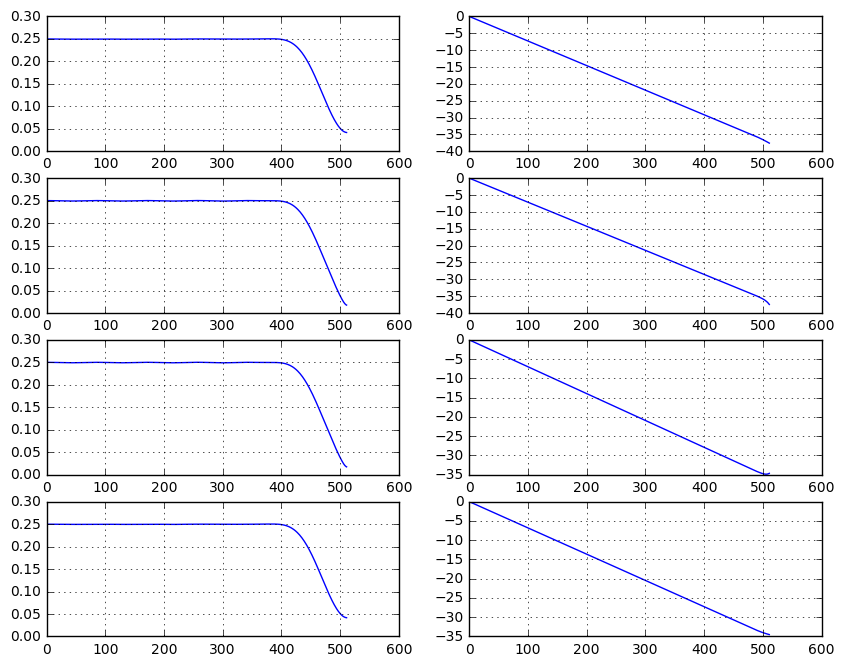

In [4]:
_, fr1 = sig.freqz(h1)
_, fr2 = sig.freqz(h2)
_, fr3 = sig.freqz(h3)
_, fr4 = sig.freqz(h4)


plt.subplots(4, 2, figsize=(10, 8))

plt.subplot(421)
plt.plot(np.abs(fr1))
plt.grid()

plt.subplot(422)
plt.plot(np.unwrap(np.angle(fr1)))
plt.grid()

plt.subplot(423)
plt.plot(np.abs(fr2))
plt.grid()

plt.subplot(424)
plt.plot(np.unwrap(np.angle(fr2)))
plt.grid()

plt.subplot(425)
plt.plot(np.abs(fr3))
plt.grid()

plt.subplot(426)
plt.plot(np.unwrap(np.angle(fr3)))
plt.grid()

plt.subplot(427)
plt.plot(np.abs(fr4))
plt.grid()

plt.subplot(428)
plt.plot(np.unwrap(np.angle(fr4)))
plt.grid()


In [5]:
# ------------------------------- polyphase interpolation
h = sig.firwin(96, 0.32)

h1 = h[ ::l]
h2 = h[1::l]
h3 = h[2::l]

y1 = l * sig.lfilter(h1, [1], y)
y2 = l * sig.lfilter(h2, [1], y)
y3 = l * sig.lfilter(h3, [1], y)

y = np.zeros(len(y1) + len(y2) + len(y3))

y[ ::l] = y1
y[1::l] = y2
y[2::l] = y3


(0, 225)

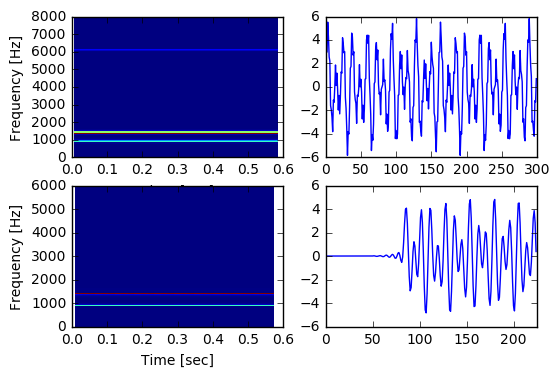

In [6]:
plt.subplot(221)
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(222)
plt.plot(s[:plot_samples])

plt.subplot(223)
f, t, Sxx = sig.spectrogram(y[96:], fs_new)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(224)
plt.plot(y[:int(plot_samples * fs_new / fs)])
plt.xlim([0, int(plot_samples * fs_new / fs)])


(0, 225)

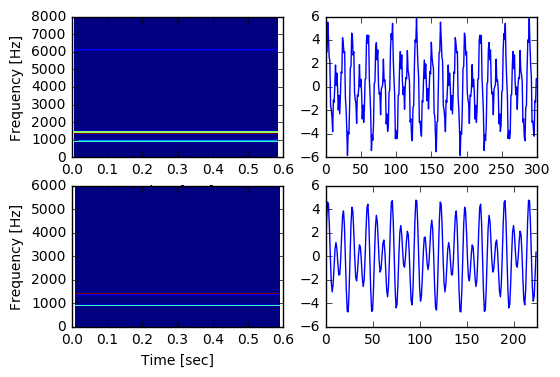

In [7]:
y = sig.resample(s, sample_count_new)

plt.subplot(221)
f, t, Sxx = sig.spectrogram(s, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(222)
plt.plot(s[:plot_samples])

plt.subplot(223)
f, t, Sxx = sig.spectrogram(y, fs_new)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(224)
plt.plot(y[:int(plot_samples * fs_new / fs)])
plt.xlim([0, int(plot_samples * fs_new / fs)])
